In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("merchant_fill_nonulls.csv", index_col = 0)

df.head()

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,No,3.76,54,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.00,14.00,54.0,14.29,Buena,8.0,10.0,1.0,9.0,26.0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,20000,Si,3.45,6135,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-63.64,Regular,1027.0,1118.0,644.0,1077.0,2269.0
2,Nouvelle mode d'été femmes robe décontractée c...,4.90,8,1000,Si,3.83,99,No,Buena,No,"Summer,Fashion,Necks,Beach,Dress,Loose,beach d...",white,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5df2576d68963c1660471f9a,5df2576d68963c1660471f9a,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-38.75,Regular,18.0,23.0,8.0,7.0,43.0
3,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,100,No,3.77,47,No,Buena,No,"Summer,Shorts,Lace,pants,Waist,Short pants,Yel...",red,S,Standard Shipping,1,No,41,50,CN,sarahouse,83% Positive Feedback,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5d58daef3159a812b05933d2,5d58daef3159a812b05933d2,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-17.83,Regular,7.0,8.0,5.0,5.0,22.0
4,Nouvelle mode d'été femmes robe décontractée c...,5.65,10,100,Si,2.86,7,No,Buena,No,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5e9fa7de39682a0043ab7898,5e9fa7de39682a0043ab7898,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-43.50,Regular,1.0,2.0,2.0,1.0,1.0


In [4]:
df.columns

Index(['title', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating_sold', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_id',
       'product_url', 'product_id', 'listed_products', 'total_units_sold',
       'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'discount_percentage',
       'seller_reputation', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'rating_five_count'],
      dtype='object')

# 1 - Calcular media y mediana de los precios
1) La variable price representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. 2) Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

In [5]:
# Medidas centrales para la variable 'income'

media_ingresos = df['price'].mean()
print(f"La media de los precios es: {np.round(media_ingresos, 2)}")

mediana_ingresos = df['price'].median()
print(f"La mediana de los precios es: {np.round(mediana_ingresos, 2)}")

La media de los precios es: 8.33
La mediana de los precios es: 8.0


Interpretación
1) Media y mediana parecen ser muy parecidos - lo que estaría sugiriendo que la distribución no presenta muchos valores atipicos, y/o que es una dsitribución simétrica

Ejemplos en los que es prefereible utilizar la mediana
1) valores atipicos
2) distribución asimétrica

# 2 Tabla de correlación
Crea una tabla de correlación que muestre cómo se relacionan las variables price, retail_price, units_sold, rating_sold, y rating_count. 
Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

In [8]:
# Matriz de correlación
#columns = df[['price', 'retail_price', 'units_sold', 'rating_sold', 'rating_count']]
correlation_matrix = df[['price', 'retail_price', 'units_sold', 'rating_sold', 'rating_count']].corr()
correlation_matrix

,price,retail_price,units_sold,rating_sold,rating_count
price,1.000000,0.304748,-0.024815,0.053469,-0.001911
retail_price,0.304748,1.000000,0.012638,0.024106,0.053872
units_sold,-0.024815,0.012638,1.000000,0.039478,0.899464
rating_sold,0.053469,0.024106,0.039478,1.000000,0.054112
rating_count,-0.001911,0.053872,0.899464,0.054112,1.000000


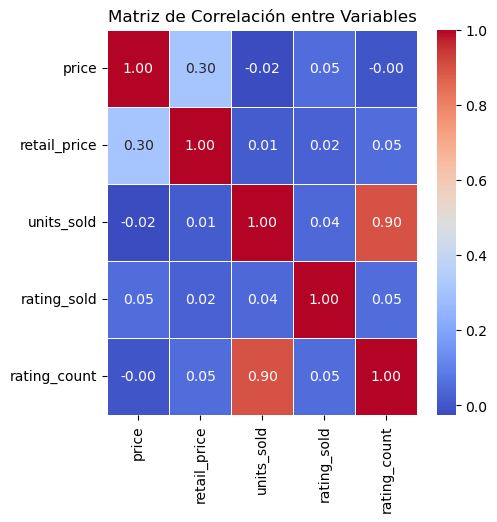

In [9]:
# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(5, 5))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Añade título
plt.title('Matriz de Correlación entre Variables')

# Muestra el gráfico

plt.show()

Observaciones:
1) Las variables units_sold y rating_count presentan una correlación positiva y cercana a 1 (0.9) -> es decir que cuando una aumenta la otra aumenta también
2) Existe una correlación positiva leve entre el price y retail_price, lo que nos indica que el precio está de alguna manera atado al precio de retail pero que esta correlación no es tan fuerte
3) El resto de las variables no presentan una correlación alta, lo que indicaría que nos muestran distintos aspectos de los productos

# 3 Tabla de contingencia
Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas uses_ad_boosts y badge_product_quality.
¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.

In [10]:
# queremos analizar cómo se distribuye el nivel de educación de los clientes en función de su estado civil.
# creamos  la tabla de contingencia usando el método crosstab de pandas
tabla_contingencia = pd.crosstab(df['uses_ad_boosts'], df['badge_product_quality'], normalize=True) * 100

# Interpretación: La tabla de contingencia muestra cuántos clientes pertenecen a cada combinación de nivel de educación y estado civil (nos mostrará el % si incluimos el parámetro "normalize", como hemos hecho en este ejemplo).
tabla_contingencia

badge_product_quality,Buena,Excelente
uses_ad_boosts,,
No,52.511125,4.195804
Si,40.050858,3.242212


In [ ]:
# Ratio de utlización de boosts en categorías de calidad
print(52.5/40)
print(4.2/3.2)

1.3125
1.3125


Observaciones:
1) La mayoría de los productosno utiliza los boosts
2) La calidad buena es la categoría más presente con el 93%
3) Los boosts se utilizan mayormente en la categoría Buena
4) La utilización de boosts no parece estar correlacionada con la calidad del producto

# 4 Tabla de contingencia 2
Crea una tabla de contingencia que examine la relación entre las variables categóricas badge_local_product y badge_fast_shipping. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.

In [12]:
# queremos analizar cómo se distribuye las categorías de producto y el envio.
# creamos  la tabla de contingencia usando el método crosstab de pandas
tabla_contingencia = pd.crosstab(df['badge_local_product'], df['badge_fast_shipping'], normalize=True) * 100

# Interpretación: La tabla de contingencia muestra cuántos clientes pertenecen a cada combinación de nivel de educación y estado civil (nos mostrará el % si incluimos el parámetro "normalize", como hemos hecho en este ejemplo).
tabla_contingencia

badge_fast_shipping,No,Si
badge_local_product,,
No,97.457088,0.699301
Si,1.271456,0.572155


In [17]:
# Porcentahe de envíos rápidos por categoría
print(0.7/(97.5+0.7)*100)
print(0.6/(1.3+0.6)*100)

0.7128309572301426
31.57894736842105


Observaciones:
1) La mayoría de los productos no son de origen local (97%)
2) Si el producto no es local, el envío rápido no parece ser una opción atractiva (1%)
3) Si el producto es local, si bien el envío normal es el preferido, la opción de envío rápido parece ser más atractiva (32%)

# 5 Media y mediana
Calcula la media y la mediana de la variable mean_product_prices. 
¿Cómo se comparan estas medidas? 
¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

In [ ]:
# Medidas centrales para la variable 'income'

media_avg_price = df['mean_product_prices'].mean()
print(f"La media de los precios promedio del producto es: {np.round(media_avg_price, 2)}")

mediana_avg_price = df['mean_product_prices'].median()
print(f"La mediana de los precios promedio del producto es: {np.round(mediana_avg_price, 2)}")

La media de los precios promedio del producto es: 8.33
La mediana de los precios promedio del producto es: 8.0


In [19]:
df[['price', 'mean_product_prices']].head(20)

,price,mean_product_prices
0,16.00,16.00
1,8.00,5.68
2,4.90,5.68
3,4.93,5.68
4,5.65,5.68
5,5.65,5.68
6,4.93,5.68
7,8.00,6.00
8,5.00,6.00
9,5.00,6.00


Observaciones:
1) En base a las medidas centrales de media y mediana - podemos concluir que la media está por encima de la mediana_avg_price - pero muy poco hay que mirar el histograma o la función de densidad
2) Las medidas centrales para esta variable son iguales que para la variable precios porque representan la misa medición agregada
3) Aqui podrían existir valores atípicos (outliers) con recios mayores, pero que no tienen tanto peso
4) Otra posibilidad es que la distribución no sea simétrica
Pero estas últimas dos conclusiones dependen también del recorrido de la variable

-- conclusión: nos quedariamos con la mediana pero los cálculos quizás no sean tan diferentes con cualquiera de las dos


# 6 Correlaciones
Realiza un análisis de correlación entre total_units_sold y mean_product_ratings_count. 
¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? 
Explica los resultados.

In [21]:
# Matriz de correlación
#columns = df[['price', 'retail_price', 'units_sold', 'rating_sold', 'rating_count']]
correlation_matrix = df[['total_units_sold' ,'mean_product_ratings_count']].corr()
correlation_matrix

,total_units_sold,mean_product_ratings_count
total_units_sold,1.00000,0.63665
mean_product_ratings_count,0.63665,1.00000


Observaciones:
1) Las dos variables presentan una correlación moderada, en el tramo superior.
2) Esta correlación es positiva, por lo que cuando una de las variables